<a href="https://colab.research.google.com/github/nahariaprateek/Diamond-Price-Prediction/blob/main/Diamond_Prediction_6th_Dec_Final_BA810_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="main"></a>

#Diamond Price Prediction

## Table of Contents

#### I. [Introduction](#Introduction) 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; a. [Motivation](#motivation)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; b. [Objective](#obj)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; c. [Data Brief](#db)

#### II. [EDA](#eda) 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; a. [Loading and Reading the Data](#dt)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; b. [Data Understanding & Distribution](#ds)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; c. [EDA & Data Cleaning](#eda)

#### III. [Machine Learning](#ml)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; a. [Train Test Split](#tsplit)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; b. [Pipeline with Feature Selection](#pipe)

#### IV. [Machine Learning Models](#QA)
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1. [Linear Regression](#ml1)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2. [Random Forest](#ml2)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3. [Bagging](#ml3)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4. [Decision Tree](#ml4)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 5. [KNN](#ml5)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 6. [XG Boost](#ml6)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 7. [Extra Trees](#ml7)

#### V. [Hyper Parameter Tuning](#tuning)

#### VI. [Test Results](#test)



<a id="Introduction"></a>

## Introduction
[Return To Index](#main)

#### a. Motivation <a id="Motivation"></a>
Problem Statement :
A diamond merchant requires to have an automated system to predict the price of a diamond based on its shape/size/color etc, since diamond is one of the most prestigious luxury gemstones, we would like to build a machine learing model to predict the price of diamonds.
 
Match its physical characteristics to its intrinsic value.
This is important to diamond collectors, jewelry sellers, as well as gemologists.


#### b. Objective <a id="Objective"></a>

To create a machine learning model which can predict the price of a diamond based on its characteristics.

#### c. Data Brief <a id="Objective"></a>
The scanerio based dictionary of the data:-

1. __price__: The price of the Diamond

2. __carat__: The carat value of the Diamond.

3. __cut__: The cut type of the Diamond, it determines the shine.

4. __color__: The color value of the Diamond.

5. __clarity__: The carat type of the Diamond.

6. __depth__: The depth value of the Diamond.

7. __table__: Flat facet on its surface — the large, flat surface facet that you can see when you look at the diamond from above.

8. __x__: Width of the diamond.

9. __y__: Length of the diamond.

10. __z__: Height of the diamond.


They have also shared the data size of 53940 diamonds consisting of shape/size/color.
__Main Data sourced from
https://www.kaggle.com/code/karnikakapoor/diamond-price-prediction/data

__<p><a href="http://www.mysolitaire.com/knowledge-center/index.html" title="Optional Title">Diamond Ref Website</a></p>__


## Loading and Reading the Data

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from plotly.offline import init_notebook_mode, iplot

url = 'https://raw.githubusercontent.com/nahariaprateek/Diamond-Price-Prediction/main/diamonds.csv'
data = pd.read_csv(url)
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
#creating copy of the raw dataset
df = data.copy()

In [ ]:
#dropping the 'Unnamed:0' column as it was only showing the index
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##Data Understanding & Distribution

Methods used for Basic data exploration in Python

head() : This helps to see a few sample rows of the data

info() : This provides the summarized information of the data

describe() : This provides the descriptive statistical details of the data

nunique(): This helps us to identify if a column is categorical or continuous


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
#Getting all the Object Categorical variables for better understanding
cat_var = (df.dtypes =="object")
object_cols = list(cat_var[cat_var].index)
print("Categorical variables:")
print(object_cols)


Categorical variables:
['cut', 'color', 'clarity']


In [ ]:
#Checking the duplicates in the dataset
rows_duplicates = df[df.duplicated()].shape[0]
print(rows_duplicates)
df = df.drop_duplicates()
df.info()

146
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [ ]:
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

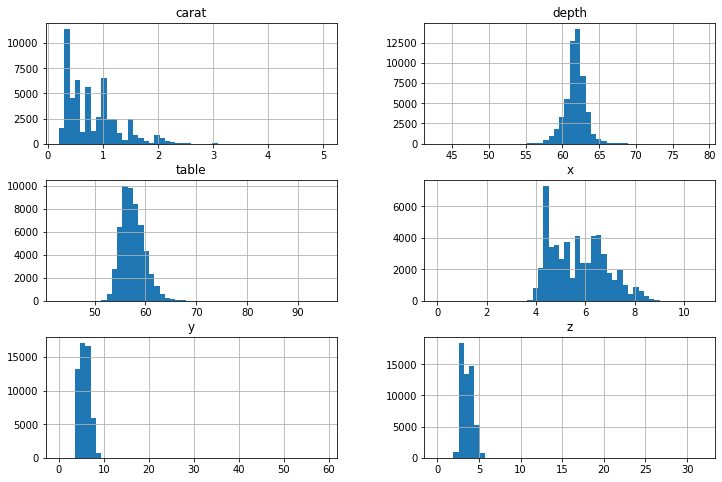

In [ ]:
import matplotlib.pyplot as plt
dff = df.drop("price", axis=1).copy()
dff.hist(bins=50, figsize=(12, 8))
plt.show()


The above py plot(Histogram) is for showing & understanding the distribution of continuous variables, which give's idea of data skewness. 

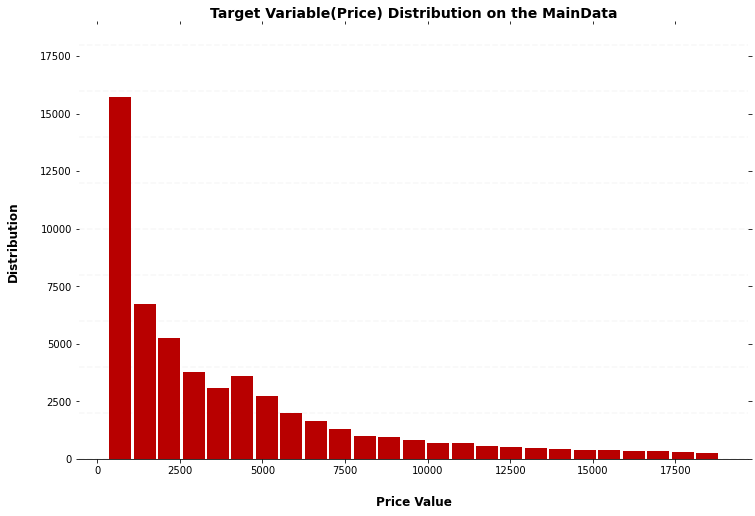

In [ ]:
#Distribution of Target Variable
ax = df.hist(column='price', bins=25, grid=False, figsize=(12,8), color='#B80000', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Target Variable(Price) Distribution on the MainData", weight='bold', size=14)

    # Set x-axis label
    x.set_xlabel("Price Value", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Distribution", labelpad=20, weight='bold', size=12)


Checking -> Price Variable (Independent variable) distribution in the dataset.

In [ ]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' wh

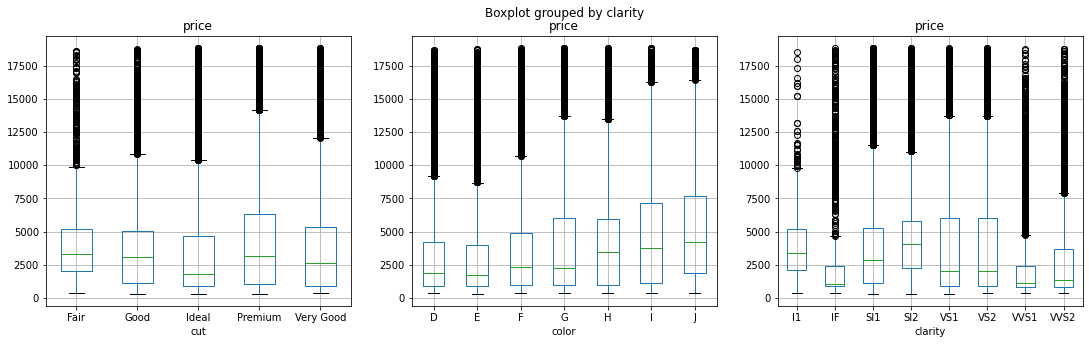

In [ ]:
# Box plots for Categorical Target Variable "price" and continuous predictors
CategoricalColsList=['cut', 'color', 'clarity']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    df.boxplot(column='price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

Interpretation of these Box Plot

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with price.

In this data, all three categorical predictors looks correlated with the Target variable.





## EDA & DataCleaninng

In [ ]:
print('0 values:', 0 in df.values)
print(df.shape)
df.describe()

0 values: True
(53794, 10)


,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
#Checking out Max values in the dataset
df.query('x==10.740000 or z==31.800000 or y==58.900000')
# 3 values with max errors 

,carat,cut,color,clarity,depth,table,price,x,y,z
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80


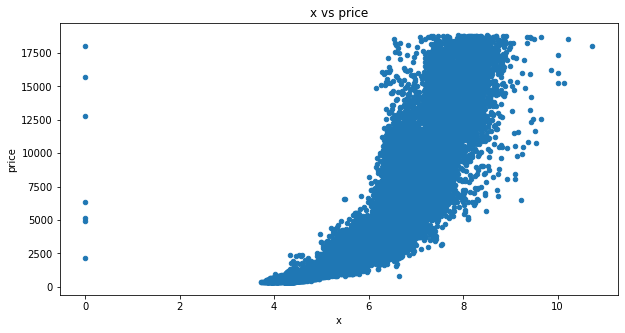

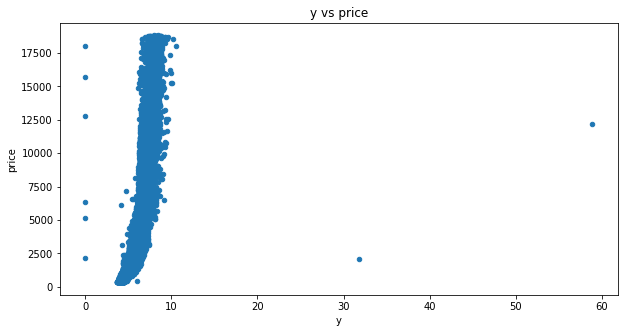

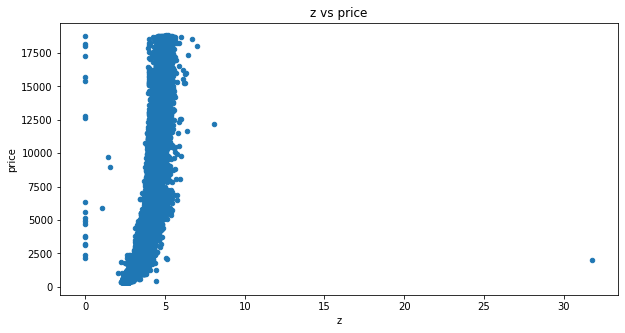

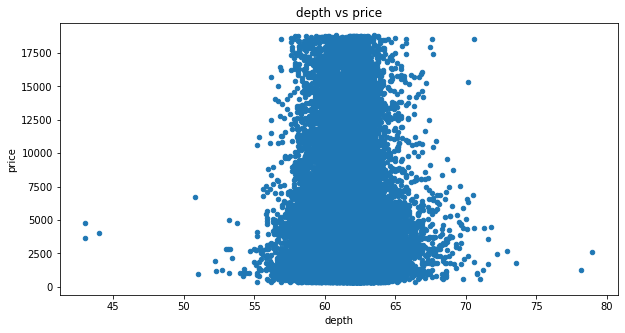

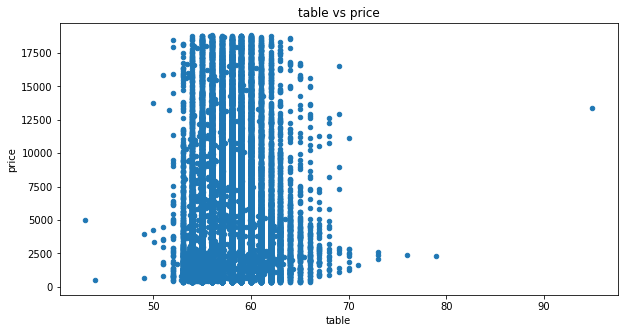

In [ ]:
num_variables = ['x','y','z','depth','table']
for scatterplot in num_variables:
    df.plot.scatter(x=scatterplot, y='price', figsize=(10,5), title=scatterplot + ' vs ' + 'price')

from the above scatterplot, we can see that for the variables __y__  ,  __z__,  __depth__ , __table__ there are few outliers seen, & are removed below.

1. Depth has outliers above 75 & below 50.

2. Table has outliers above 80 and below 50

3. Dimensions 'y' & 'z' have above 30 & 15.

In [ ]:
df.drop(df.query('y>30 or z>15').index,inplace=True)
df.drop(df.query('depth>75 or depth<50').index, inplace=True)
df.drop(df.query('table<50 or table>80').index, inplace=True)

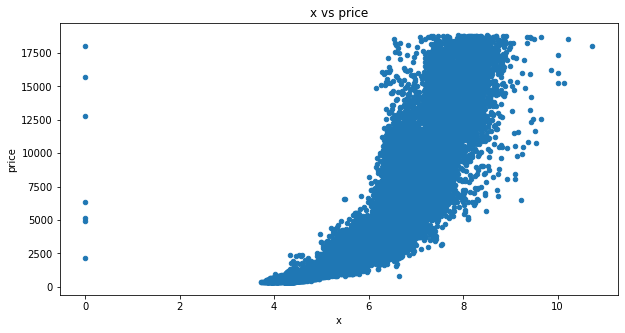

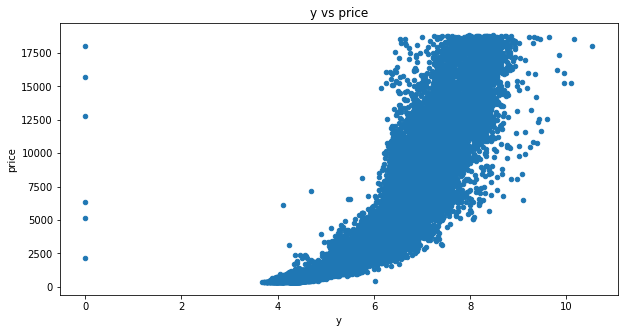

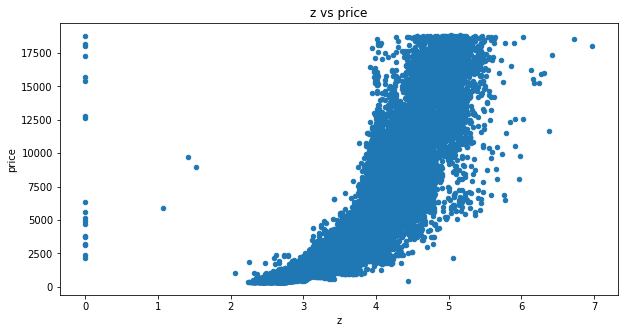

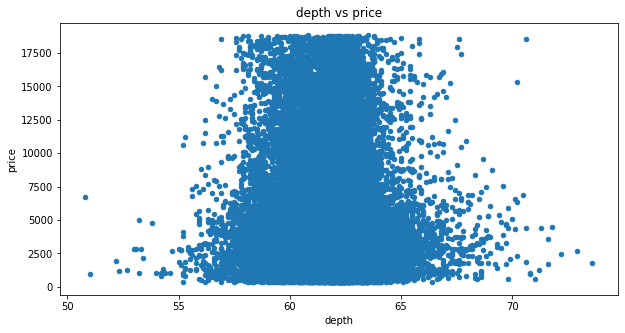

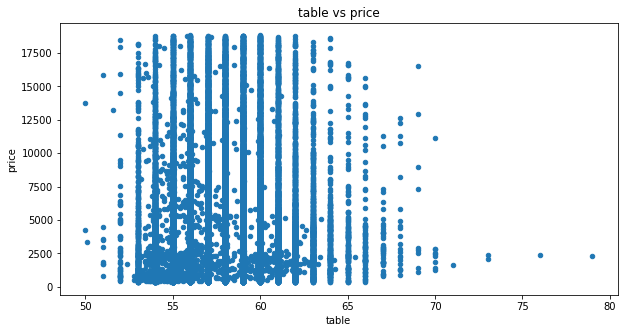

In [ ]:
num_variables = ['x','y','z','depth','table']
for scatterplot in num_variables:
    df.plot.scatter(x=scatterplot, y='price', figsize=(10,5), title=scatterplot + ' vs ' + 'price')

After dropping the observations -> Outliers are seen to be removed in the above graphs successfully.

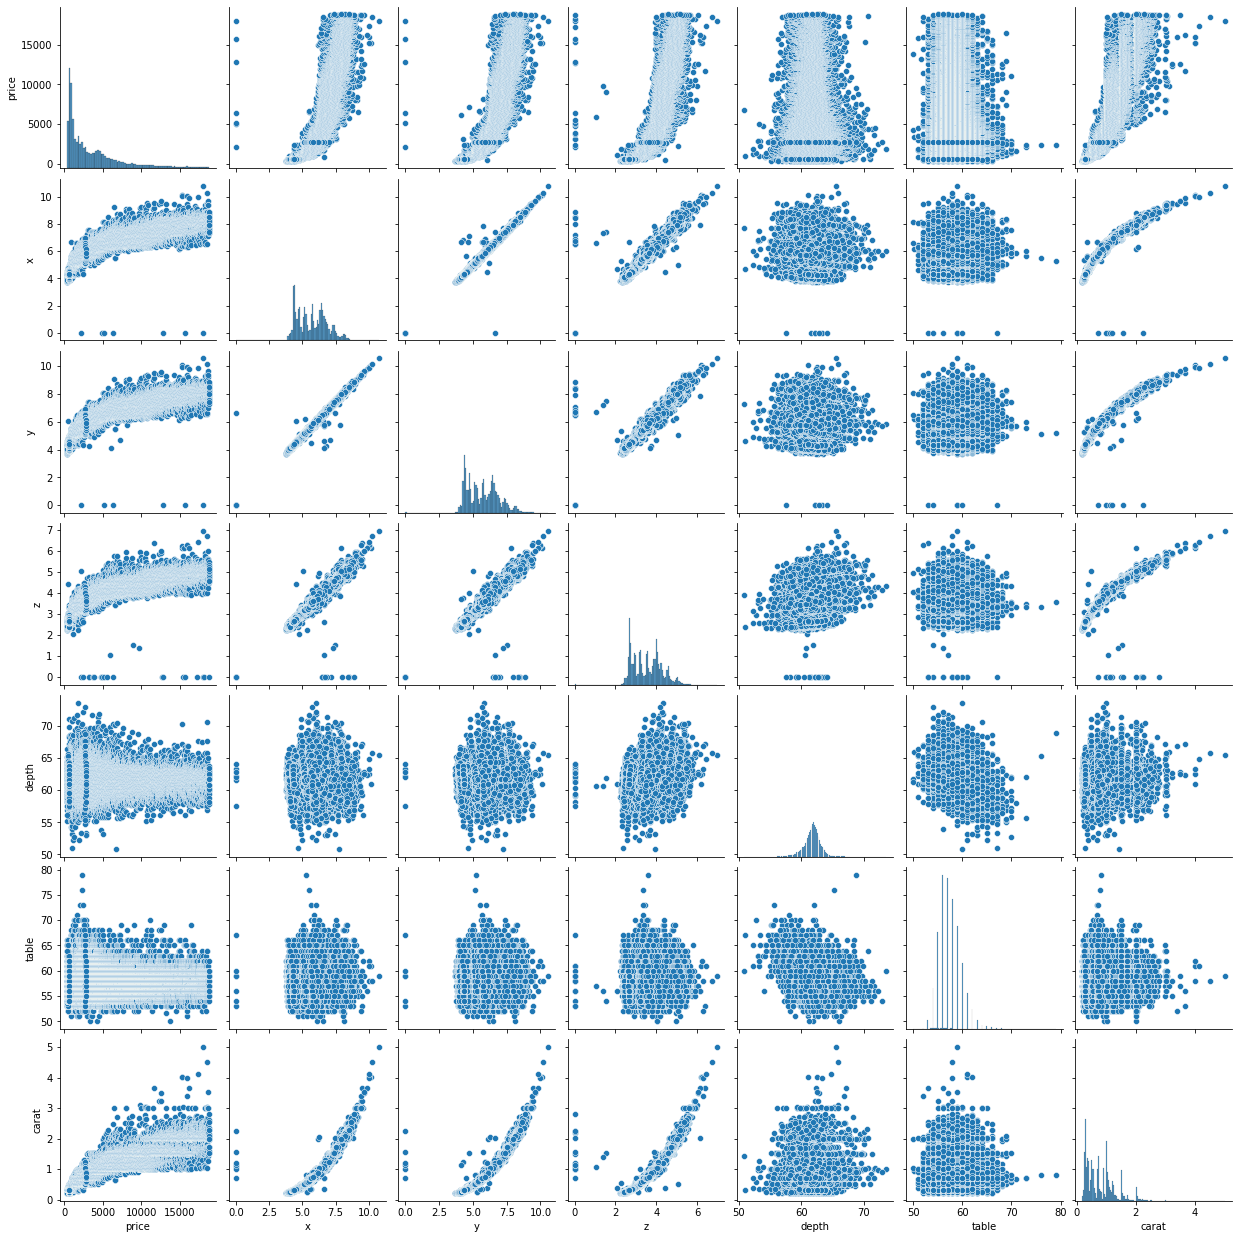

In [ ]:
#maindata_pairplot=sns.pairplot(maindata, hue= 'cut') #pairplot with respect to cut or categorical only 5 unique values
pplot = sns.pairplot(df[['price','x','y','z','depth','table','carat']])


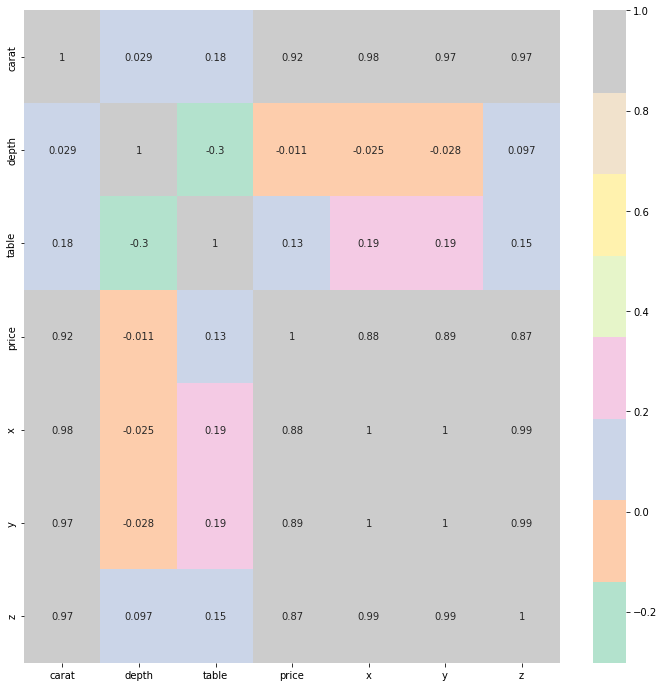

In [ ]:
correlationmatrix = df.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(correlationmatrix, cmap='Pastel2',annot=True)

In [ ]:
#Checking all Object DTypes
for iterator in df.select_dtypes('object').columns:
    print(df.iloc[:][iterator].value_counts(),'\n')

Ideal        21485
Premium      13747
Very Good    12067
Good          4891
Fair          1591
Name: cut, dtype: int64 

G    11260
E     9770
F     9519
H     8271
D     6755
I     5405
J     2801
Name: color, dtype: int64 

SI1     13029
VS2     12226
SI2      9149
VS1      8151
VVS2     5056
VVS1     3647
IF       1784
I1        739
Name: clarity, dtype: int64 



In [ ]:
# Assigning the Object Dtypes Datasets to numerics (Dummy Variables)
print('Variables of CUT',df.cut.unique())
print('Variables of COLOR',df.color.unique())
print('Variables of CLARITY',df.clarity.unique())

Variables of CUT ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Variables of COLOR ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Variables of CLARITY ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [ ]:
# #creating copy of the raw dataset
datac = df.copy()
datafeature_eng = df.copy()
datac['cut'].replace({'Fair':1,'Good':2,'Very Good':3,'Ideal':4,'Premium':5}, inplace=True)
datac['color'].replace({'D':1, 'E':2, 'F':3, 'G':4, 'H':5, 'I':6, 'J':7}, inplace=True)
datac['clarity'].replace({'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7,'I1':8}, inplace=True)
#Apply Label Encoder to assign values to all the non numerical values under the categorical columns 
datafeature_eng['volume']=datafeature_eng.x * datafeature_eng.y * datafeature_eng.z
datafeature_eng['lenwidth']=datafeature_eng.x / datafeature_eng.y

Since, we are using iterative imputer -> values are also imputed manually in another data set as 'datac' -> for code reusability perposes.


In [ ]:
print(df.head()) #the values for the categorical variables are converted into numeric forms
print(datac.head())
print(datafeature_eng.info())
datafeature_eng.head(1)

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
   carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    4      2        1   61.5   55.0    326  3.95  3.98  2.43
1   0.21    5      2        2   59.8   61.0    326  3.89  3.84  2.31
2   0.23    2      2        4   56.9   65.0    327  4.05  4.07  2.31
3   0.29    5      6        3   62.4   58.0    334  4.20  4.23  2.63
4   0.31    2      7        1   63.3   58.0    335  4.34  4.35  2.75
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53781 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------ 

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,lenwidth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.20203,0.992462


In [ ]:
#Checking all Object DTypes
for iterator in df.select_dtypes('object').columns:
    print(df.iloc[:][iterator].value_counts(),'\n')
else:
    print("No Object Dtypes available in the diamonds dataset")

Ideal        21485
Premium      13747
Very Good    12067
Good          4891
Fair          1591
Name: cut, dtype: int64 

G    11260
E     9770
F     9519
H     8271
D     6755
I     5405
J     2801
Name: color, dtype: int64 

SI1     13029
VS2     12226
SI2      9149
VS1      8151
VVS2     5056
VVS1     3647
IF       1784
I1        739
Name: clarity, dtype: int64 

No Object Dtypes available in the diamonds dataset


### ANOVA

In [ ]:
#ANOVA results for cut and Price
from scipy import stats
r_coefficient, p_value = stats.pearsonr(datac["carat"],datac["price"])
print("The pearson cofficient value is ",r_coefficient,"and the P_value = ",p_value)


The pearson cofficient value is  0.9215505943966232 and the P_value =  0.0


Conclusion:
P-Value is 0.00, the correlation is significant (price~carat)
r-coef which is linear correlation is 0.921

In [ ]:
#Cut ~ Price
r_coefficient, p_value = stats.pearsonr(datac["cut"],datac["price"])
print("The pearson cofficient value is ",r_coefficient,"and the P_value = ",p_value)

The pearson cofficient value is  0.02967637835872863 and the P_value =  5.838932927561138e-12


In [ ]:
#Clarity~Price
r_coefficient, p_value = stats.pearsonr(datac["clarity"],datac["price"])
print("The pearson cofficient value is ",r_coefficient,"and the P_value = ",p_value)

The pearson cofficient value is  -0.1411660664424775 and the P_value =  2.0878382864283964e-237


ANOVA: Analysis of Variance
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant is our calculated score value.

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.

Let's group the different types of cut, color and clarity and see if they impact price

In [ ]:
f_value,p_value = stats.f_oneway(data[["cut","price"]]\
                             .groupby(["cut"]).get_group("Fair")["price"],data[["cut","price"]]\
                             .groupby(["cut"]).get_group("Good")["price"],data[["cut","price"]]\
                             .groupby(["cut"]).get_group("Ideal")["price"],data[["cut","price"]]\
                             .groupby(["cut"]).get_group("Premium")["price"],data[["cut","price"]]\
                             .groupby(["cut"]).get_group("Very Good")["price"])
print( "ANOVA results: F=", f_value, ", P =", p_value)
#df['cut'].replace({'Fair':1,'Good':2,'Very Good':3,'Ideal':4,'Premium':5}

ANOVA results: F= 175.68871735080606 , P = 8.42830730759452e-150


In [ ]:
f_val,p_val = stats.f_oneway(data[["color","price"]]\
                             .groupby(["color"]).get_group("D")["price"],data[["color","price"]]\
                             .groupby(["color"]).get_group("E")["price"],data[["color","price"]]\
                             .groupby(["color"]).get_group("F")["price"],data[["color","price"]]\
                             .groupby(["color"]).get_group("G")["price"],data[["color","price"]]\
                             .groupby(["color"]).get_group("H")["price"],data[["color","price"]]\
                             .groupby(["color"]).get_group("I")["price"],data[["color","price"]]\
                             .groupby(["color"]).get_group("J")["price"])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 290.20588071108835 , P = 0.0


In [ ]:
#ANOVA results for clarity and Price
f_val,p_val = stats.f_oneway(data[["clarity","price"]].groupby(["clarity"])\
                             .get_group("I1")["price"],data[["clarity","price"]]\
                             .groupby(["clarity"]).get_group("IF")["price"],data[["clarity","price"]]\
                             .groupby(["clarity"]).get_group("SI1")["price"],data[["clarity","price"]]\
                             .groupby(["clarity"]).get_group("SI2")["price"],data[["clarity","price"]]\
                             .groupby(["clarity"]).get_group("VS1")["price"],data[["clarity","price"]]\
                             .groupby(["clarity"]).get_group("VS2")["price"],data[["clarity","price"]]\
                             .groupby(["clarity"]).get_group("VVS1")["price"],data[["clarity","price"]]\
                             .groupby(["clarity"]).get_group("VVS2")["price"])
print( "ANOVA results: F=", f_val, ", P =", p_val)


ANOVA results: F= 215.01926041020076 , P = 1.9190895e-316


Observations ↕

The selected columns in this step are not final, further study will be done and then a final list will be created

Continuous: price  __This is the Target Variable ♦ !__

Continuous ✈ carat, depth, table, x, y, z 

Categorical ✈ color, clarity, cut.

#Machine Learning
<a id="ml"></a>

## Test Train Split
<a id="tsplit"></a>

Splitting the dataset into train and test

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=2000)
len(train_set), len(test_set)

(43024, 10757)

Separate the target variable

In [ ]:
df_X = train_set.drop("price", axis=1).copy()
df_y = train_set["price"].copy()

df_X_test = test_set.drop("price", axis=1).copy()
df_y_test = test_set["price"].copy()

Find the rows with zero dimensions (x, y, z)

In [ ]:
zero_dimension = ((df_X['x'] == 0) | (df_X['y'] == 0) | (df_X['z'] == 0))
df_X[zero_dimension]

,carat,cut,color,clarity,depth,table,x,y,z
2314,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0
27112,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,0.00,0.00,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,0.00,6.62,0.0
49556,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,6.50,6.47,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,6.88,6.83,0.0


Records identified for dimensions having zero. Now convert them to NaN so as that the imputer can locate them. Otherwise, these wrong values will be treated as 0 and harm our models.

In [ ]:
#Replacing 0 dimensions with NaN in order to be able to use the imputer strategies
df_X1 = df_X.copy()
df_X1['x'].replace(0, np.nan, inplace=True)
df_X1['y'].replace(0, np.nan, inplace=True)
df_X1['z'].replace(0, np.nan, inplace=True)

null_rows_idx = (df_X1['x'].isnull() | df_X1['y'].isnull() | df_X1['z'].isnull())
df_X1[null_rows_idx]

,carat,cut,color,clarity,depth,table,x,y,z
51506,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,NaN
10167,1.50,Good,G,I1,64.0,61.0,7.15,7.04,NaN
27739,2.80,Good,G,SI2,63.8,58.0,8.90,8.85,NaN
24394,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,NaN
2207,1.00,Premium,G,SI2,59.1,59.0,6.55,6.48,NaN
27503,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,NaN
11963,1.00,Very Good,H,VS2,63.3,53.0,NaN,NaN,NaN
27112,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,NaN
15951,1.14,Fair,G,VS1,57.5,67.0,NaN,NaN,NaN
13601,1.15,Ideal,G,VS2,59.2,56.0,6.88,6.83,NaN


####Simple Imputer

Test: use simple imputer to impute the missing dimensions.

In [ ]:
#SimpleImputer(median)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

df_X1_num = df_X1.select_dtypes(include=[np.number])
imputer.fit(df_X1_num)
X = imputer.transform(df_X1_num)
df_X_num_median = pd.DataFrame(X, columns=df_X1_num.columns, index=df_X1_num.index)

df_X_num_median.loc[null_rows_idx]

,carat,depth,table,x,y,z
51506,1.12,60.4,59.0,6.71,6.67,3.53
10167,1.50,64.0,61.0,7.15,7.04,3.53
27739,2.80,63.8,58.0,8.90,8.85,3.53
24394,2.18,59.4,61.0,8.49,8.45,3.53
2207,1.00,59.1,59.0,6.55,6.48,3.53
27503,2.02,62.7,53.0,8.02,7.95,3.53
11963,1.00,63.3,53.0,5.70,5.71,3.53
27112,2.20,61.2,59.0,8.42,8.37,3.53
15951,1.14,57.5,67.0,5.70,5.71,3.53
13601,1.15,59.2,56.0,6.88,6.83,3.53


This is for reference/testing purpose on how well the imputer behaves.
However, it was discovered, simple imputer is not the best strategy as it uses only the information of single column.

But we have used iterative imputer in the pipeline which uses informations from other columns as well.


! Simple Imputer is not Utilized in the project.

##Pipeline With Feature Selection
<a id="pipe"></a>

Build the pipeline: for numerical variables, standard scaler and iterative imputer are used; for categorical variables, one hot encoder is used to turn them into columns of dummy variables, and simple imputer is also implemented for missing values. Sequential feature selector is used to select columns from the processed data. Here we set n_features_to_select = 1.0 so that every column is selected, we will later use feature selection by grid search to find out which columns to keep or not).

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV


from sklearn import set_config
set_config(display='diagram') # shows the pipeline graphically when printed

num_pipeline = Pipeline([
        ('imputer', IterativeImputer()),
        ('scaler', StandardScaler())
    ])
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('cat_encoder', OneHotEncoder(sparse=False))
    ])

IterativeImputer.get_feature_names_out = StandardScaler.get_feature_names_out
SimpleImputer.get_feature_names_out = StandardScaler.get_feature_names_out
#carat	cut	color	clarity	depth	table	price	x	y	z
num_attribs = ['carat', 'depth', 'table', 'x', 'y', 'z']
cat_attribs = ['cut', 'color', 'clarity']

prep_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs)])

preprocess_pipeline = Pipeline([
    ('prep', prep_pipeline),
    ('select', SequentialFeatureSelector(LinearRegression(), n_features_to_select=1.0,direction='forward'))
])

preprocess_pipeline

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('select',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=1.0))])

Training data through the pipeline now

In [ ]:
processed_X = preprocess_pipeline.fit_transform(df_X1, df_y)
y_df = df_y.values
df_processed_X = pd.DataFrame(processed_X, 
                              columns = preprocess_pipeline.get_feature_names_out(),
                              index = df_X.index)
print(df_processed_X.shape)

/usr/local/lib/python3.8/dist-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



(43024, 26)


In [ ]:
df_processed_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43140 entries, 25864 to 27582
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num__carat          43140 non-null  float64
 1   num__depth          43140 non-null  float64
 2   num__table          43140 non-null  float64
 3   num__x              43140 non-null  float64
 4   num__y              43140 non-null  float64
 5   num__z              43140 non-null  float64
 6   cat__cut_Fair       43140 non-null  float64
 7   cat__cut_Good       43140 non-null  float64
 8   cat__cut_Ideal      43140 non-null  float64
 9   cat__cut_Premium    43140 non-null  float64
 10  cat__cut_Very Good  43140 non-null  float64
 11  cat__color_D        43140 non-null  float64
 12  cat__color_E        43140 non-null  float64
 13  cat__color_F        43140 non-null  float64
 14  cat__color_G        43140 non-null  float64
 15  cat__color_H        43140 non-null  float64
 16  

After pre-processing pipeline, now there are 26 columns in the processed training data

##Machine Learning Models

####Linear Regression 
 <a id="ml1"></a>

 Initially proceeding with linear regression, one of the most common regression algorithms. Create the pipepline, fit the model.

In [ ]:
from sklearn import linear_model
linear_reg = make_pipeline(preprocess_pipeline, linear_model.LinearRegression())
linear_reg.fit(df_X1, y_df)

/usr/local/lib/python3.8/dist-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('prep',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    IterativeImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   ['carat',
                                                                    'depth',
                                                                    'table',
                                                                    'x', 'y',
                                                                    'z']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('cat_encoder',
                                                                                    OneHotEncoder(sparse=False))]),
                                                                   ['cut',
                                                                    'color',
                                                                    'clarity'])])),
                                 ('select',
                                  SequentialFeatureSelector(estimator=LinearRegression(),
                                                            n_features_to_select=1.0))])),
                ('linearregression', LinearRegression())])

Make predictions with training data, and observe the training errors

In [ ]:
linear_reg_pred = linear_reg.predict(df_X1)
import sklearn.metrics as metrics
print("Mean absolute error =", metrics.mean_absolute_error(y_df, linear_reg_pred)) 
print("Mean squared error =", metrics.mean_squared_error(y_df, linear_reg_pred)) 
print("Median absolute error =", metrics.median_absolute_error(y_df, linear_reg_pred)) 
print("Explain variance score =", metrics.explained_variance_score(y_df, linear_reg_pred))
print("R squared =", metrics.r2_score(y_df, linear_reg_pred))

Mean absolute error = 732.0710189359756
Mean squared error = 1262610.457923484
Median absolute error = 520.915822965783
Explain variance score = 0.9216254899325312
R squared = 0.9216254899325312


Use cross-validation to test the negative root of mean squared error of the model.

In [ ]:
from sklearn.model_selection import cross_val_score
linear_reg_rmses = -cross_val_score(linear_reg, df_X1, y_df, scoring="neg_root_mean_squared_error", cv=5)
print('Test data error {:.2f}'.format(linear_reg_rmses.mean()))

Test data error 1125.58


####Random Forest 
<a id="ml2"></a>

We tried random forest for the following reasons:

1. It can handle large datasets efficiently;

2. The random forest algorithm provides a higher level of accuracy in predicting outcomes over the decision tree algorithm

Disadvantage of random forest:

When using a random forest, more resources are required for computation. It consumes more time compared to a decision tree algorithm.

Similar procedures were implemented as in the linear regression model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest = make_pipeline(preprocess_pipeline, RandomForestRegressor())
random_forest

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('prep',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    IterativeImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   ['carat',
                                                                    'depth',
                                                                    'table',
                                                                    'x', 'y',
                                                                    'z']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('cat_encoder',
                                                                                    OneHotEncoder(sparse=False))]),
                                                                   ['cut',
                                                                    'color',
                                                                    'clarity'])])),
                                 ('select',
                                  SequentialFeatureSelector(estimator=LinearRegression(),
                                                            n_features_to_select=1.0))])),
                ('randomforestregressor', RandomForestRegressor())])

In [ ]:
random_forest.fit(df_X1, y_df)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('prep',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    IterativeImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   ['carat',
                                                                    'depth',
                                                                    'table',
                                                                    'x', 'y',
                                                                    'z']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('cat_encoder',
                                                                                    OneHotEncoder(sparse=False))]),
                                                                   ['cut',
                                                                    'color',
                                                                    'clarity'])])),
                                 ('select',
                                  SequentialFeatureSelector(estimator=LinearRegression(),
                                                            n_features_to_select=1.0))])),
                ('randomforestregressor', RandomForestRegressor())])

In [ ]:
random_forest_pred = random_forest.predict(df_X1)
print("Mean absolute error =", metrics.mean_absolute_error(y_df, random_forest_pred)) 
print("Mean squared error =", metrics.mean_squared_error(y_df, random_forest_pred)) 
print("Median absolute error =", metrics.median_absolute_error(y_df, random_forest_pred)) 
print("Explain variance score =", metrics.explained_variance_score(y_df, random_forest_pred))
print("R squared =", metrics.r2_score(y_df, random_forest_pred))

Mean absolute error = 101.03632493672731
Mean squared error = 42035.48404747569
Median absolute error = 36.81999999999971
Explain variance score = 0.9973908949399001
R squared = 0.9973907150483388


In [ ]:
random_forest_rmses = -cross_val_score(random_forest, df_X1, y_df, scoring="neg_root_mean_squared_error", cv=5)
print('Test data error {:.2f}'.format(random_forest_rmses.mean()))

Test data error 553.67


#### Bagging Regression
<a id="ml3"></a>

We are proceeding to bagging as one of the part of Ensemble learning. Since it is one of the approach which actually avoids - overfitting of the data which is used for regression. And it deals with higher dimensional data easily.

In [ ]:
from sklearn.ensemble import BaggingRegressor
bagging = make_pipeline(preprocess_pipeline, BaggingRegressor())
bagging

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('prep',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    IterativeImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   ['carat',
                                                                    'depth',
                                                                    'table',
                                                                    'x', 'y',
                                                                    'z']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('cat_encoder',
                                                                                    OneHotEncoder(sparse=False))]),
                                                                   ['cut',
                                                                    'color',
                                                                    'clarity'])])),
                                 ('select',
                                  SequentialFeatureSelector(estimator=LinearRegression(),
                                                            n_features_to_select=1.0))])),
                ('baggingregressor', BaggingRegressor())])

In [ ]:
# bagging = BaggingRegressor(random_state=2000)
bagging.fit(processed_X, y_df)

BaggingRegressor(random_state=2000)

In [ ]:
bagging_pred = bagging.predict(processed_X)
print("Mean absolute error =", metrics.mean_absolute_error(y_df, bagging_pred)) 
print("Mean squared error =", metrics.mean_squared_error(y_df, bagging_pred)) 
print("Median absolute error =", metrics.median_absolute_error(y_df, bagging_pred)) 
print("Explain variance score =", metrics.explained_variance_score(y_df, bagging_pred))
print("R squared =", metrics.r2_score(y_df, bagging_pred))

Mean absolute error = 112.07916356307628
Mean squared error = 59109.43425982782
Median absolute error = 38.69999999999982
Explain variance score = 0.9963150036221399
R squared = 0.9963145713230274


In [ ]:
bagging_rmses = -cross_val_score(bagging, df_X1, y_df, scoring="neg_root_mean_squared_error", cv=5)
print('Test data error {:.2f}'.format(bagging_rmses.mean()))

Test data error 585.39


#### Decision Tree

We proceeded with the concept keeping in mind the manual model operational decisions like a flowchart.
For better understanding on lower test error upon cross validation.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = make_pipeline(preprocess_pipeline, DecisionTreeRegressor())
decision_tree

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('prep',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    IterativeImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   ['carat',
                                                                    'depth',
                                                                    'table',
                                                                    'x', 'y',
                                                                    'z']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('cat_encoder',
                                                                                    OneHotEncoder(sparse=False))]),
                                                                   ['cut',
                                                                    'color',
                                                                    'clarity'])])),
                                 ('select',
                                  SequentialFeatureSelector(estimator=LinearRegression(),
                                                            n_features_to_select=1.0))])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [ ]:
decision_tree.fit(df_X1, y_df)
decision_tree_pred = decision_tree.predict(df_X1)

In [ ]:
print("Mean absolute error =", metrics.mean_absolute_error(y_df, decision_tree_pred)) 
print("Mean squared error =", metrics.mean_squared_error(y_df, decision_tree_pred)) 
print("Median absolute error =", metrics.median_absolute_error(y_df, decision_tree_pred)) 
print("Explain variance score =", metrics.explained_variance_score(y_df, decision_tree_pred))
print("R squared =", metrics.r2_score(y_df, decision_tree_pred))

Mean absolute error = 0.41287913922641684
Mean squared error = 48.10007188572489
Median absolute error = 0.0
Explain variance score = 0.9999970142655286
R squared = 0.9999970142655286


In [ ]:
decision_tree_rmses = -cross_val_score(decision_tree, df_X1, y_df, scoring="neg_root_mean_squared_error", cv=5)
print('Test data error {:.2f}'.format(decision_tree_rmses.mean()))

Test data error 754.71


#### KNN
<a id="ml5"></a>

The k-nearest neighbors algorithm (KNN) is a non-parametric method used for regression in our case of predicting the price of diamond. 

Considering Linear Regression pipeline with sequential feature selector, to construct ***__knn_regressor pipeline__***


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = make_pipeline(preprocess_pipeline, KNeighborsRegressor())
knn_regressor

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('prep',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    IterativeImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   ['carat',
                                                                    'depth',
                                                                    'table',
                                                                    'x', 'y',
                                                                    'z']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('cat_encoder',
                                                                                    OneHotEncoder(sparse=False))]),
                                                                   ['cut',
                                                                    'color',
                                                                    'clarity'])])),
                                 ('select',
                                  SequentialFeatureSelector(estimator=LinearRegression(),
                                                            n_features_to_select=1.0))])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [ ]:
knn_regressor.fit(df_X1, y_df)
knn_pred = knn_regressor.predict(df_X1)

In [ ]:
import sklearn.metrics as metrics
print("Mean absolute error =", metrics.mean_absolute_error(y_df, knn_pred)) 
print("Mean squared error =", metrics.mean_squared_error(y_df, knn_pred)) 
print("Median absolute error =", metrics.median_absolute_error(y_df, knn_pred)) 
print("Explain variance score =", metrics.explained_variance_score(y_df, knn_pred))
print("R squared =", metrics.r2_score(y_df, knn_pred))

Mean absolute error = 324.8482723364703
Mean squared error = 393268.06130916695
Median absolute error = 133.0
Explain variance score = 0.9754926538269345
R squared = 0.9754673092425757


In [ ]:
from sklearn.model_selection import cross_val_score
knn_rmses = -cross_val_score(knn_regressor, df_X1, y_df, scoring="neg_root_mean_squared_error", cv=5)
print('Test data error {:.2f}'.format(knn_rmses.mean()))

/usr/local/lib/python3.8/dist-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.

/usr/local/lib/python3.8/dist-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



Test data error 806.06


####XG Boost Regression

<a id="ml6"></a>

This model was implemented keeping in mind the advantage of gradient boosting approaches, having minimum error, with fast processing speed.

Therefor for lower computation costs & faster/improved speed.

In [ ]:
from xgboost import XGBRegressor
xgb = make_pipeline(preprocess_pipeline, XGBRegressor())
xgb

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('prep',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    IterativeImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   ['carat',
                                                                    'depth',
                                                                    'table',
                                                                    'x', 'y',
                                                                    'z']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('cat_encoder',
                                                                                    OneHotEncoder(sparse=False))]),
                                                                   ['cut',
                                                                    'color',
                                                                    'clarity'])])),
                                 ('select',
                                  SequentialFeatureSelector(estimator=LinearRegression(),
                                                            n_features_to_select=1.0))])),
                ('xgbregressor', XGBRegressor())])

In [ ]:
xgb.fit(df_X1, y_df)
xgb_pred = xgb.predict(df_X1)

/usr/local/lib/python3.8/dist-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



[23:25:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
import sklearn.metrics as metrics
print("Mean absolute error =", metrics.mean_absolute_error(y_df, xgb_pred)) 
print("Mean squared error =", metrics.mean_squared_error(y_df, xgb_pred)) 
print("Median absolute error =", metrics.median_absolute_error(y_df, xgb_pred)) 
print("Explain variance score =", metrics.explained_variance_score(y_df, xgb_pred))
print("R squared =", metrics.r2_score(y_df, xgb_pred))

Mean absolute error = 395.7444634308238
Mean squared error = 509712.90754189383
Median absolute error = 188.81097412109375
Explain variance score = 0.9682197855893142
R squared = 0.9682197843711279


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
xgb_rmses = -cross_val_score(xgb, df_X1, y_df, scoring="neg_root_mean_squared_error", cv=5)
print('Test data error {:.2f}'.format(xgb_rmses.mean()))

[23:31:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:31:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:32:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:33:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:33:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test data error 739.72


#### Extra Trees 
<a id="ml7"></a>

This model has advantage over, reduction in bias, which consists of sampling from the entire dataset during the construction of trees.

Where different subsets of the data may introduce different biases in the results obtained. Hence Extra trees prevent it by sampling the entire dataset.

In [ ]:
from sklearn.tree import ExtraTreeRegressor
extra_tree = make_pipeline(preprocess_pipeline, ExtraTreeRegressor())
extra_tree

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('prep',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    IterativeImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   ['carat',
                                                                    'depth',
                                                                    'table',
                                                                    'x', 'y',
                                                                    'z']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('cat_encoder',
                                                                                    OneHotEncoder(sparse=False))]),
                                                                   ['cut',
                                                                    'color',
                                                                    'clarity'])])),
                                 ('select',
                                  SequentialFeatureSelector(estimator=LinearRegression(),
                                                            n_features_to_select=1.0))])),
                ('extratreeregressor', ExtraTreeRegressor())])

In [ ]:
extra_tree.fit(df_X1, y_df)
extra_tree_pred = extra_tree.predict(df_X1)

/usr/local/lib/python3.8/dist-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



In [ ]:
import sklearn.metrics as metrics
print('Mean absolute error =', metrics.mean_absolute_error(y_df, extra_tree_pred))
print('Mean squared error =', metrics.mean_squared_error(y_df, extra_tree_pred))
print('Median absolute error =', metrics.median_absolute_error(y_df, extra_tree_pred))
print('Explain variance score =', metrics.explained_variance_score(y_df, extra_tree_pred))
print('R squared =', metrics.r2_score(y_df, extra_tree_pred))

Mean absolute error = 0.4719749652294854
Mean squared error = 62.1683240611961
Median absolute error = 0.0
Explain variance score = 0.9999961238518493
R squared = 0.9999961238518493


In [ ]:
from sklearn.model_selection import cross_val_score
extra_tree_rmses = -cross_val_score(extra_tree, df_X1, y_df, scoring='neg_root_mean_squared_error', cv=5)
print('Test data error {:.2f}'.format(extra_tree_rmses.mean()))

/usr/local/lib/python3.8/dist-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.

/usr/local/lib/python3.8/dist-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.

/usr/local/lib/python3.8/dist-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.

/usr/local/lib/python3.8/dist-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



Test data error 740.50


## Hyper-Parameter Tuning (Random Search)
<a id="tuning"></a>

#### Extra Trees Regressor Hyper Parameter Tuning

Random Search for extra trees regressor.

Hyperparameters to be tuned: max_depth, min_samples_leaf, min_samples_split, max_leaf_nodes.

Number of iterations: 50

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
pipeline_et = Pipeline([("extra_trees", ExtraTreeRegressor(random_state=2000))])
param_distribs_et = [ 
    {'extra_trees__max_depth': randint(5, 50), 
     'extra_trees__min_samples_leaf': randint(2, 20),
     'extra_trees__min_samples_split': randint(2, 142), 
     'extra_trees__max_leaf_nodes': randint(5, 500)}]
random_search_et = RandomizedSearchCV(pipeline_et, param_distribs_et, n_iter=50, cv=5, 
                                 scoring='neg_root_mean_squared_error', random_state=2000)
random_search_et.fit(df_processed_X, y_df)
cv_res_et = pd.DataFrame(random_search_et.cv_results_)
cv_res_et.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res_et.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_extra_trees__max_depth,param_extra_trees__max_leaf_nodes,param_extra_trees__min_samples_leaf,param_extra_trees__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
20,0.073399,0.002258,0.003445,0.000040,37,435,2,17,"{'extra_trees__max_depth': 37, 'extra_trees__m...",-675.016356,-630.971720,-664.249392,-649.118735,-674.815142,-658.834269,16.836182,1
94,0.073344,0.002330,0.003480,0.000090,25,471,4,6,"{'extra_trees__max_depth': 25, 'extra_trees__m...",-661.304443,-642.301112,-667.798529,-651.974312,-671.604674,-658.996614,10.675350,2
70,0.076060,0.003078,0.003560,0.000122,22,441,11,17,"{'extra_trees__max_depth': 22, 'extra_trees__m...",-669.387466,-636.294592,-665.519730,-652.657936,-682.919594,-661.355863,15.814931,3
34,0.076582,0.001314,0.003572,0.000152,41,464,10,41,"{'extra_trees__max_depth': 41, 'extra_trees__m...",-657.779030,-638.701181,-679.459321,-648.583613,-683.257878,-661.556205,17.299662,4
80,0.077076,0.002008,0.003536,0.000071,33,494,13,12,"{'extra_trees__max_depth': 33, 'extra_trees__m...",-668.490616,-643.615688,-665.610130,-645.792945,-687.335899,-662.169056,16.109485,5


Select the model with the best tuned hyperparameters, fit on the processed training set, and make predictions.

In [ ]:
best_model_et = random_search_et.best_estimator_
random_search_et.best_params_
best_model_et.fit(df_processed_X, y_df)
best_model_et_pred = best_model_et.predict(df_processed_X)

Examine the errors of the best tuned model

In [ ]:
import sklearn.metrics as metrics
print("Mean absolute error =", metrics.mean_absolute_error(y_df, best_model_et_pred)) 
print("Mean squared error =", metrics.mean_squared_error(y_df, best_model_et_pred)) 
print("Median absolute error =", metrics.median_absolute_error(y_df, best_model_et_pred)) 
print("Explain variance score =", metrics.explained_variance_score(y_df, best_model_et_pred))
print("R squared =", metrics.r2_score(y_df, best_model_et_pred))

Mean absolute error = 348.4892290797807
Mean squared error = 339028.6461138895
Median absolute error = 192.2478348778434
Explain variance score = 0.978861501262604
R squared = 0.9788615012626039


Cross validation on the mean squared error specifically

In [ ]:
from sklearn.model_selection import cross_val_score
best_model_et_rmses = -cross_val_score(best_model_et, df_processed_X, y_df, scoring="neg_root_mean_squared_error", cv=5)
print('Test data error {:.2f}'.format(best_model_et_rmses.mean()))

Test data error 658.83


Summary of results:

Extra Trees

1. Mean Absolute Error   = 348.49

2. Mean Squared Error    = 339028.64

3. Median Absolute Error = 192.24

4. Variance Scroe        = 0.9789

Test Error after CV = 5 is as 658.83  -> which got improved from 740.50 originally.

#### KNN Hyper-parameter Tuning

Random Search for KNN regressor.

Hyperparameters to be tuned: n_neighbors, algorithm, leaf_size, p.

Number of iterations: 50

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
pipeline_knn = Pipeline([("knn", KNeighborsRegressor())])
param_distribs_knn = [ 
    {'knn__n_neighbors': randint(1, 30), 
     'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
     'knn__leaf_size': randint(1, 50), 
     'knn__p': [1,2]}]
random_search_knn = RandomizedSearchCV(pipeline_knn, param_distribs_knn, n_iter=50, cv=5, 
                                 scoring='neg_root_mean_squared_error', random_state=2000)
random_search_knn.fit(df_processed_X, y_df)
cv_res_knn = pd.DataFrame(random_search_knn.cv_results_)
cv_res_knn.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res_knn.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__algorithm,param_knn__leaf_size,param_knn__n_neighbors,param_knn__p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,0.006276,0.000144,12.112903,0.063178,brute,46,5,1,"{'knn__algorithm': 'brute', 'knn__leaf_size': ...",-709.282795,-751.487676,-741.892089,-707.145841,-743.061502,-730.573981,18.566706,1
9,0.006142,0.000197,12.263549,0.253359,auto,27,4,1,"{'knn__algorithm': 'auto', 'knn__leaf_size': 2...",-716.819103,-751.071980,-733.187209,-705.804938,-746.052030,-730.587052,17.142160,2
34,0.181515,0.012060,2.598277,0.046140,kd_tree,13,6,1,"{'knn__algorithm': 'kd_tree', 'knn__leaf_size'...",-715.453160,-761.241915,-743.491501,-696.288640,-748.958375,-733.086718,23.739945,3
14,0.095266,0.008292,5.198751,0.093376,ball_tree,38,6,1,"{'knn__algorithm': 'ball_tree', 'knn__leaf_siz...",-715.464732,-761.250207,-743.525027,-696.265021,-748.957914,-733.092580,23.750397,4
15,0.007046,0.001430,12.165715,0.038166,auto,22,8,1,"{'knn__algorithm': 'auto', 'knn__leaf_size': 2...",-728.797375,-782.251250,-750.412568,-714.099541,-758.538696,-746.819886,23.668761,5


Select the model with the best tuned hyperparameters, fit on the processed training set, and make predictions.

In [ ]:
best_model_knn = random_search_knn.best_estimator_
random_search_knn.best_params_
best_model_knn.fit(df_processed_X, y_df)
best_model_knn_pred = best_model_knn.predict(df_processed_X)

Examine the errors of the best tuned model

In [ ]:
import sklearn.metrics as metrics
print("Mean absolute error =", metrics.mean_absolute_error(y_df, best_model_knn_pred)) 
print("Mean squared error =", metrics.mean_squared_error(y_df, best_model_knn_pred)) 
print("Median absolute error =", metrics.median_absolute_error(y_df, best_model_knn_pred)) 
print("Explain variance score =", metrics.explained_variance_score(y_df, best_model_knn_pred))
print("R squared =", metrics.r2_score(y_df, best_model_knn_pred))

Mean absolute error = 287.97515340275197
Mean squared error = 317490.72838694684
Median absolute error = 116.39999999999998
Explain variance score = 0.9802113651546137
R squared = 0.980204394413067


Cross validation on the mean squared error specifically.

In [ ]:
best_model_knn_rmses = -cross_val_score(best_model_knn, df_processed_X, y_df, scoring="neg_root_mean_squared_error", cv=5)
print('Test data error {:.2f}'.format(best_model_knn_rmses.mean()))

Test data error 730.57


Here above, we have implemented Random Search on KNN model and achieved results as :-    

KNN 
1. Mean Absolute Error   = 287.97

2. Mean Squared Error    = 317490.72

3. Median Absolute Error = 116.39

4. Variance Scroe        = 0.98021

Test Error after CV = 5 is as 730.57  -> which got improved from 806.06 originally.

#### Bagging Regressor Hyper Parameter Tuning

Random Search for Bagging regressor.

Hyperparameters to be tuned: n_neighbors, algorithm, leaf_size, p.

Number of iterations: 100

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
pipeline_bg = Pipeline([("bagging", BaggingRegressor(random_state=2000))])
param_distribs_bg = [
    {'bagging__n_estimators': randint(70, 500),
     'bagging__max_samples': np.arange(0.5, 1.25, 0.25),
     'bagging__max_features': randint(low=2, high=24)}]
random_search_bg = RandomizedSearchCV(pipeline_bg, param_distribs_bg, n_iter=100, cv=5, 
                                 scoring='neg_root_mean_squared_error', random_state=2000)
random_search_bg.fit(df_processed_X, y_df)
cv_res_rf = pd.DataFrame(random_search_bg.cv_results_)
cv_res_rf.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res_rf.head()

KeyboardInterrupt: ignored

#### Stacking Regressor

To cap off our machine learning project on diamond prediction, we stacking regressor that utilizes the strengths of the three most promising models by using their output as an input for another model (default=RidgeCV)

By using stacking method, we are expecting to build a model either very close to Bagging or better than Bagging

In [ ]:
X_test = test_set.drop("price", axis=1).copy()
y_test = test_set["price"].copy()
y_test.isna().sum()
X_test_prepared = prep_pipeline.transform(X_test)
X_test_prepared.shape
#any(np.isnan(X_test_prepared))
(np.isnan(X_test_prepared)).any()

False

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RidgeCV

bag_model= BaggingRegressor(max_features = 23, max_samples = 1.0, n_estimators = 436) #done
knn_model = KNeighborsRegressor(algorithm='auto',leaf_size=27, n_neighbors=4,p=1) #incomplete
et_model = ExtraTreesRegressor(max_depth=33, max_leaf_nodes=429, min_samples_leaf=8, min_samples_split=26)
# Get these models in a list
estimators = [('Bagging', bag_model),
              ('KNN', knn_model),
              ('ExtraTree',et_model)]
#Stack these models with StackingRegressor
stacking_regressor = StackingRegressor(estimators=estimators,
                                       final_estimator=RidgeCV())

In [ ]:
import sklearn.metrics as metrics
stacking_regressor.fit(X_test_prepared, y_test)
stack_model_pred = stacking_regressor.predict(X_test_prepared)
print('Mean absolute error =', metrics.mean_absolute_error(y_test, stack_model_pred))
print('Mean squared error =', metrics.mean_squared_error(y_test, stack_model_pred))
print('Median absolute error =', metrics.median_absolute_error(y_test, stack_model_pred))
print('Explain variance score =', metrics.explained_variance_score(y_test, stack_model_pred))
print('R squared =', metrics.r2_score(y_test, stack_model_pred))

Mean absolute error = 144.05248682872445
Mean squared error = 81290.25858579087
Median absolute error = 63.87643346095365
Explain variance score = 0.99471466694051
R squared = 0.9947103366272185


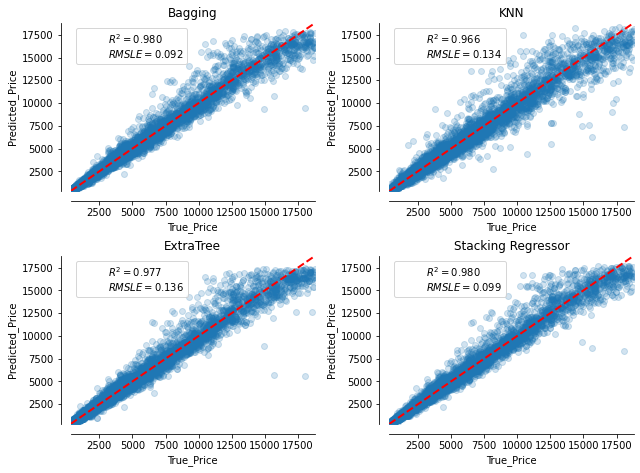

In [ ]:
from sklearn.metrics import r2_score, mean_squared_log_error
import math
df_X_prepared = prep_pipeline.fit_transform(df_X)
def plot_regression_results(ax, y_true, y_pred, title, scores):
    """Scatter plot of the predicted vs true targets."""
    ax.plot([y_true.min(), y_true.max()],
            [y_true.min(), y_true.max()],
            '--r', linewidth=2)
    ax.scatter(y_true, y_pred, alpha=0.2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([y_true.min(), y_true.max()])
    ax.set_ylim([y_true.min(), y_true.max()])
    ax.set_xlabel('True_Price')
    ax.set_ylabel('Predicted_Price')
    extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
    ax.legend([extra], [scores], loc='upper left')
    title = title
    ax.set_title(title)

fig, axs = plt.subplots(2, 2, figsize=(9, 7))
axs = np.ravel(axs)
errors_list=[]
for ax, (name, est) in zip(axs, estimators + [('Stacking Regressor',
                                               stacking_regressor)]):
    model = est.fit(df_X_prepared, df_y)
                     

    
    pred = model.predict(X_test_prepared)
    errors = y_test - model.predict(X_test_prepared)
    errors_list.append(errors)
    test_r2= r2_score((y_test), (pred))
    
    test_rmsle=math.sqrt(mean_squared_log_error(y_test,pred))
    plot_regression_results(ax,y_test,pred,name,(r'$R^2={:.3f}$' + '\n' + 
                            r'$RMSLE={:.3f}$').format(test_r2,test_rmsle))
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

Select the model with the best tuned hyperparameters, fit on the processed training set, and make predictions.

## Test Results
<a id="test"></a>

Finally, apply the best tuned models of bagging, extra trees, and KNN to the testing set and see how well they perform.

#### Extra Trees

Pre-process the testing set first

In [ ]:
y_df_test = df_y_test.values
df_X_test1 = df_X_test.copy()
df_X_test1['x'].replace(0, np.nan, inplace=True)
df_X_test1['y'].replace(0, np.nan, inplace=True)
df_X_test1['z'].replace(0, np.nan, inplace=True)

In [ ]:
processed_X_test = preprocess_pipeline.fit_transform(df_X_test1, df_y_test)
df_processed_X_test = pd.DataFrame(processed_X_test, 
                              columns = preprocess_pipeline.get_feature_names_out(),
                              index = df_X_test1.index)

/usr/local/lib/python3.8/dist-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



Errors in the testing set

In [ ]:
best_model_et.fit(df_processed_X_test, y_df_test)

Pipeline(steps=[('extra_trees',
                 ExtraTreeRegressor(max_depth=37, max_leaf_nodes=435,
                                    min_samples_leaf=2, min_samples_split=17,
                                    random_state=2000))])

In [ ]:
best_model_et_test_pred = best_model_et.predict(df_processed_X_test)
import sklearn.metrics as metrics
print("Mean absolute error =", metrics.mean_absolute_error(y_df_test, best_model_et_test_pred)) 
print("Mean squared error =", np.sqrt(metrics.mean_squared_error(y_df_test, best_model_et_test_pred))) 
print("Median absolute error =", metrics.median_absolute_error(y_df_test, best_model_et_test_pred)) 
print("Explain variance score =", metrics.explained_variance_score(y_df_test, best_model_et_test_pred))
print("R squared =", metrics.r2_score(y_df_test, best_model_et_test_pred))

Mean absolute error = 327.78583201781925
Mean squared error = 581.4989723925567
Median absolute error = 170.70000000000073
Explain variance score = 0.9779967196067327
R squared = 0.9779967196067327


#### KNN

In [ ]:
best_model_knn.fit(df_processed_X_test, y_df_test)

Pipeline(steps=[('knn',
                 KNeighborsRegressor(algorithm='brute', leaf_size=46, p=1))])

In [ ]:
best_model_knn_test_pred = best_model_knn.predict(df_processed_X_test)
print("Mean absolute error =", metrics.mean_absolute_error(y_df_test, best_model_knn_test_pred)) 
print("Mean squared error =", metrics.mean_squared_error(y_df_test, best_model_knn_test_pred)) 
print("Median absolute error =", metrics.median_absolute_error(y_df_test, best_model_knn_test_pred)) 
print("Explain variance score =", metrics.explained_variance_score(y_df_test, best_model_knn_test_pred))
print("R squared =", metrics.r2_score(y_df_test, best_model_knn_test_pred))

Mean absolute error = 364.9400948219764
Mean squared error = 517957.4775309101
Median absolute error = 140.79999999999995
Explain variance score = 0.9663793142554868
R squared = 0.9662958299651363


Results on Test Data 


Mean absolute error = 364.9400948219764

Mean squared error = 517957.4775309101

Median absolute error = 140.79999999999995

Explain variance score = 0.9663793142554868

R squared = 0.9662958299651363

#### Bagging

In [ ]:
X_test = test_set.drop("price", axis=1).copy()
y_test = test_set["price"].copy()
y_test.isna().sum()
X_test_prepared = prep_pipeline.transform(X_test)
X_test_prepared.shape
#any(np.isnan(X_test_prepared))
(np.isnan(X_test_prepared)).any()

False

In [ ]:
best_model__test_pred = bag_model.predict(X_test_prepared)
print("Mean absolute error =", metrics.mean_absolute_error(y_test, best_model__test_pred)) 
print("Mean squared error =", metrics.mean_squared_error(y_test, best_model__test_pred)) 
print("Median absolute error =", metrics.median_absolute_error(y_test, best_model__test_pred)) 
print("Explain variance score =", metrics.explained_variance_score(y_test, best_model__test_pred))
print("R squared =", metrics.r2_score(y_test, best_model__test_pred))

Mean absolute error = 271.0514110062021
Mean squared error = 313763.53600251535
Median absolute error = 97.96253822629956
Explain variance score = 0.9796082744756441
R squared = 0.9795829966224636


Here above we can see that, the test are as :-
Mean absolute error = 271.0514110062021

Mean squared error = 313763.53600251535

Median absolute error = 97.96253822629956

Explain variance score = 0.9796082744756441

R squared = 0.9795829966224636

 